# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [46]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [47]:
from scr.RQ1_forecast import *

In [48]:
num_samples = 100

In [49]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/solar-energy/1A'

# metric section

In [50]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 27943.58it/s]
100%|##########| 100/100 [00:00<00:00, 211.50it/s]


In [51]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,2019.402669,598.436890,1791.799927,74.658330,24.025698,1.037842,0.158530,1.229193,NaN,5.842292,235.832631,0.041667,598.436865,0.541667,168.698005,0.833333
1,1,1.0,1216.130371,456.895782,947.400024,39.475001,11.950842,1.592969,0.220558,1.413001,NaN,13.014789,181.803660,0.041667,456.895799,0.458333,162.893253,0.833333
2,2,2.0,1558.733398,421.335480,512.900024,21.370834,11.483932,1.528714,0.791030,1.571406,NaN,32.586279,154.013386,0.000000,421.335484,0.458333,431.228538,0.791667
3,3,3.0,224.834635,185.401367,265.350006,11.056250,11.954380,0.646211,0.677395,1.507031,NaN,7.341354,111.870172,0.000000,185.401358,0.541667,142.837524,0.916667
4,4,4.0,2870.017578,819.790283,1342.600098,55.941671,20.941937,1.631078,0.585660,1.407523,NaN,14.933656,431.153584,0.166667,819.790379,0.583333,184.440640,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,954,132.0,570.623576,365.112915,243.200012,10.133334,11.539443,1.318351,5.801353,1.602179,NaN,12.312700,130.478222,0.291667,365.112932,0.791667,133.394482,0.958333
955,955,133.0,431.425456,273.083344,294.750000,12.281250,11.952502,0.951974,2.700282,1.533861,NaN,5.622436,68.850379,0.083333,273.083344,0.791667,149.727085,1.000000
956,956,134.0,319.555501,282.374634,308.750000,12.864583,12.001636,0.980334,5.846256,1.506704,NaN,5.525442,64.731250,0.125000,282.374614,0.916667,126.428919,1.000000
957,957,135.0,309.511027,258.765503,147.899994,6.162500,10.437402,1.033006,8.690380,1.575838,NaN,3.789427,39.412081,0.000000,258.765499,0.833333,150.436419,1.000000


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,2019.402669,598.436890,1791.799927,74.658330,24.025698,1.037842,0.158530,1.229193,NaN,5.842292,235.832631,0.041667,598.436865,0.541667,168.698005,0.833333
1,137,0.0,718.545736,374.505371,1627.949951,67.831248,24.022371,0.649577,0.222699,1.221874,NaN,6.697982,174.627846,0.041667,374.505363,0.750000,166.678793,0.958333
2,274,0.0,2040.664388,615.164368,1352.599976,56.358332,24.036565,1.066369,0.276495,1.263949,NaN,12.423396,339.329610,0.083333,615.164389,0.708333,228.145595,0.958333
3,411,0.0,2422.986003,725.752747,2323.600098,96.816671,24.053575,1.257181,0.142497,1.247661,NaN,19.616685,269.244695,0.000000,725.752731,0.333333,483.660755,0.666667
4,548,0.0,785.221191,388.657074,2260.250000,94.177083,24.050071,0.673347,0.079196,1.169308,NaN,3.687271,220.902641,0.000000,388.657069,0.500000,90.049041,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,410,136.0,2233.754883,619.357178,612.900024,25.537501,16.200384,1.592959,1.680391,1.472916,NaN,31.654167,540.422320,0.291667,619.357189,0.958333,198.180612,1.000000
955,547,136.0,2559.966797,675.722656,1532.449951,63.852081,16.184125,1.739675,0.165331,1.296938,NaN,37.967382,221.738759,0.000000,675.722631,0.416667,635.723807,0.666667
956,684,136.0,989.931315,410.138916,1489.300049,62.054169,16.193131,1.055332,0.120356,1.224054,NaN,10.126644,178.353107,0.000000,410.138924,0.541667,148.241510,0.750000
957,821,136.0,3088.449219,736.751953,475.000000,19.791667,16.202090,1.894694,5.208185,1.532594,NaN,34.813347,569.461008,0.375000,736.751913,0.791667,248.590265,1.000000


# Forecast section

In [11]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 31398.21it/s]
100%|###########| 100/100 [00:38<00:00,  2.62it/s]


In [12]:
len(forcast_list1)

100

In [13]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=137)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [19]:
sorted_forcast_list1[0].head(26)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2006-02-18 16:10:00,0.00,-0.342639,0.218864,0.139929,-0.154113,-0.206324,-0.635738,...,0.242705,-0.540946,0.473920,0.167558,-0.845178,0.067606,0,-0.287772,0.783683,0.122473
1,1,0,2006-02-18 16:20:00,0.00,-1.209466,0.247872,-0.318849,-0.557898,-0.019995,-0.248063,...,-1.097222,-0.476333,0.074818,-0.604466,-0.302775,0.163909,0,-0.116422,0.832450,0.105347
2,1,0,2006-02-18 16:30:00,0.00,-0.349078,-0.147415,-0.141024,0.001174,1.200859,0.438004,...,-0.326106,-0.464866,-0.544568,-0.083657,-0.911324,0.074566,0,0.190065,0.939153,0.101568
3,1,0,2006-02-18 16:40:00,0.00,0.771672,-0.343111,-0.119208,0.268658,0.689923,0.626084,...,0.043025,0.022500,0.455353,0.210948,0.542617,-0.024236,0,0.188933,0.742889,0.154050
4,1,0,2006-02-18 16:50:00,0.00,-6.000044,5.066976,2.712438,4.303754,3.655238,0.437560,...,2.847416,5.954746,-0.225985,1.813464,-3.956256,7.953918,0,5.037612,6.623710,0.118770
5,1,0,2006-02-18 17:00:00,69.65,52.893390,57.157738,93.720360,80.477295,76.221750,78.489560,...,70.124290,74.061990,61.009720,69.913080,61.040550,82.756340,0,78.762724,18.304493,0.161681
6,1,0,2006-02-18 17:10:00,110.60,118.359740,92.651660,172.363480,147.473460,132.330150,139.733380,...,143.036450,143.356540,127.751700,189.730670,140.095520,172.282500,0,141.211017,57.906171,0.091733
7,1,0,2006-02-18 17:20:00,94.50,149.379320,136.565930,224.290400,187.810360,201.706360,138.857540,...,140.689600,172.508450,197.249560,216.966770,143.717860,194.359970,0,174.912203,55.241280,0.129102
8,1,0,2006-02-18 17:30:00,101.80,160.923000,157.789110,214.703300,197.987490,207.265580,257.054630,...,89.085335,218.964900,159.824660,208.551570,149.975370,192.863820,0,186.394453,63.091715,0.156856
9,1,0,2006-02-18 17:40:00,177.45,217.690160,242.580250,135.753750,172.232590,202.466720,245.043610,...,46.133380,205.374940,131.896580,179.978870,152.273040,151.503420,0,171.863377,69.128482,0.167580


In [20]:
target_forcast_series = get_forcast_target(forcast_list1)

In [21]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

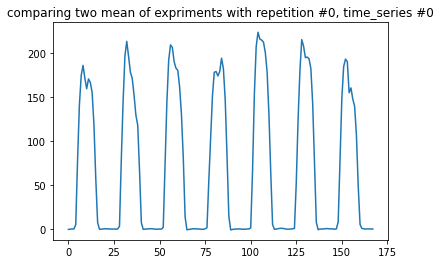

In [22]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [36]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[37]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[60]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[36]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[42]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [37]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.44238790406673617
percentage of underprediction of best repetition for experiment A = 0.4041970802919708
percentage of underprediction of highest repetition for experiment A = 0.712113312478276
percentage of underprediction of lowest repetition for experiment A = 0.16319082377476538


In [38]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(36, 42)

In [39]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [40]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (53, 59)


(10500.0, 10650.0)

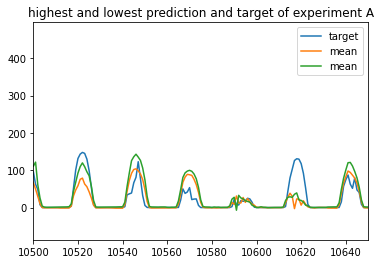

In [41]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[36]['mean'].plot(legend=True)
sorted_forcast_list1[42]['mean'].plot(legend=True)
plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

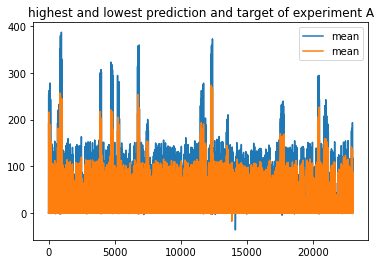

In [42]:
plt.title('highest and lowest prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[53]['mean'].plot(legend=True)
sorted_forcast_list1[59]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## find the tuples for all the time series (it takes much time)

In [119]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


In [ ]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

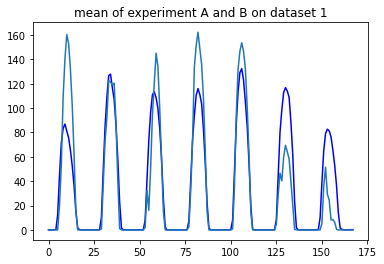

In [45]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape